This is a notebook to help preview collateX processing of variant texts, working with segments of the 1818, 1823, and 1831 editions of *Frankenstein*.

In [1]:
from collatex import *
collation = Collation() 
with \
    open('1818_openingLetters.txt','r') as f1818, \
    open('1823_openingLetters.txt','r') as f1823, \
    open('1831_openingLetters.txt','r') as f1831: 
    w1818=f1818.read() 
    w1823=f1823.read() 
    w1831=f1831.read() 
    collation.add_plain_witness('w1818', w1818) 
    collation.add_plain_witness('w1823', w1823) 
    collation.add_plain_witness('w1831', w1831) 
# outputs colored HTML in Jupyter notebook
collate(collation, segmentation=True, output='html2', layout='vertical')
# creates SVG in Jupyter notebook (try also svg2)
# collate(collation, segmentation=True, output='svg')
# outputs TEI into a file called collation.xml
# tei = collate(collation, segmentation=True, output='tei')
# with \
# open('collation.xml', 'w') as output
#   output.write(tei)

In [2]:
from collatex import *
collation = Collation() 
with \
    open('1818_openingLetters.txt','r') as f1818, \
    open('1823_openingLetters.txt','r') as f1823, \
    open('1831_openingLetters.txt','r') as f1831: 
    w1818=f1818.read() 
    w1823=f1823.read() 
    w1831=f1831.read() 
    collation.add_plain_witness('w1818', w1818) 
    collation.add_plain_witness('w1823', w1823) 
    collation.add_plain_witness('w1831', w1831) 
# outputs colored HTML in Jupyter notebook
# collate(collation, segmentation=True, output='html2', layout='vertical')
# creates SVG in Jupyter notebook (try also svg2)
collate(collation, segmentation=True, output='svg')
# outputs TEI into a file called collation.xml
# tei = collate(collation, segmentation=True, output='tei')
# with \
# open('collation.xml', 'w') as output
#   output.write(tei)

/Users/ebb8/anaconda3/lib/python3.6/site-packages/pygraphviz-1.4rc1-py3.6-macosx-10.7-x86_64.egg/pygraphviz/agraph.py:1334: RuntimeWarning: Error: not well-formed (invalid token) in line 1 
... <FONT FACE='Bukyvede'>Peters- burgh ...
in label of node 766
Error: not well-formed (invalid token) in line 3 
... , 

< pb n=" 10013"/> ...
in label of node 20
Error: not well-formed (invalid token) in line 1 
... <B>< pb n=" 10014"/> ...
in label of node 39
Error: not well-formed (invalid token) in line 1 
... <FONT FACE='Bukyvede'>and in beauty every region hitherto  ...
in label of node 40
Error: not well-formed (invalid token) in line 1 
... <FONT FACE='Bukyvede'>with the joy a child feels when he embarks  ...
in label of node 75
Error: not well-formed (invalid token) in line 1 
... <B>< pb n=" 10015"/> ...
in label of node 76
Error: not well-formed (invalid token) in line 1 
... <FONT FACE='Bukyvede'>eye. This expedition has been the favourite dream of  ...
in label of node 90
Error: n

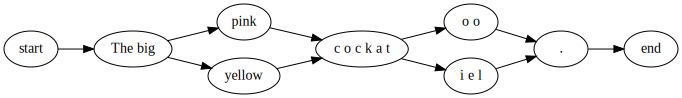

In [3]:
%load_ext autoreload
%autoreload 2
from collatex import *
collation = Collation() 
collation.add_plain_witness('w1818', 'The big pink c o c k a t o o.') 
collation.add_plain_witness('w1823', 'The big yellow c o c k a t o o.') 
collation.add_plain_witness('w1831', 'The big yellow c o c k a t i e l.') 
collate(collation, segmentation=True, output='svg_simple')
# collate(collation, segmentation=True, output='svg')

In [4]:
from collatex import *
import re

def tokenize(input):
    words = re.split(r'\s+', input) # split on whitespace
    tokens_by_word = [re.findall(r'.+\w|\W+$', word) for word in words] # break off final punctuation
    tokens = []
    for item in tokens_by_word:
        tokens.extend(item)
    token_list = [{"t": token} for token in tokens] # create dictionaries for each token
    return token_list

input_a = "Peter's cat."
input_b = "Peter's dog."

tokens_a = tokenize(input_a)
print('tokens_a =', tokens_a)
tokens_b = tokenize(input_b)
print('tokens_b =', tokens_b)
witness_a = { "id": "A", "tokens": tokens_a }
print('witness_a = ', witness_a)
witness_b = { "id": "B", "tokens": tokens_b }
input = { "witnesses": [ witness_a, witness_b ] }
table = collate(input, segmentation=False)
print(table)

tokens_a = [{'t': "Peter's"}, {'t': 'cat'}, {'t': '.'}]
tokens_b = [{'t': "Peter's"}, {'t': 'dog'}, {'t': '.'}]
witness_a =  {'id': 'A', 'tokens': [{'t': "Peter's"}, {'t': 'cat'}, {'t': '.'}]}
+---+---------+-----+---+
| A | Peter's | cat | . |
| B | Peter's | dog | . |
+---+---------+-----+---+


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
+---+-----+-----+------+-------+
| A | The | big | gray | koala |
| B | The | -   | grey | koala |
+---+-----+-----+------+-------+


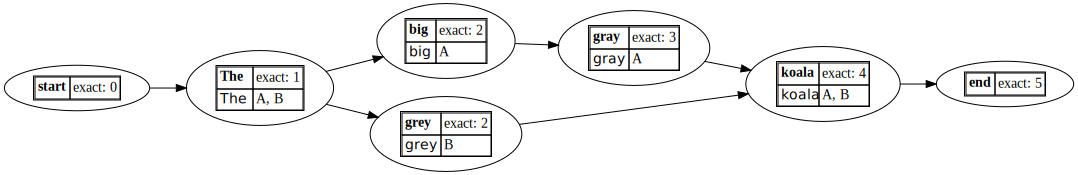

In [5]:
%load_ext autoreload
%autoreload 2
from collatex import *
collation = Collation()
collation.add_plain_witness('A','The big gray koala')
collation.add_plain_witness('B','The grey koala')
table = collate(collation, segmentation=False, near_match=True)
print(table)
collate(collation,segmentation=False,near_match=True,output="svg")